# Bài tập 3: Face Dataset

In [1]:
# import libray
from sklearn.cluster import KMeans, DBSCAN, spectral_clustering
from sklearn.datasets import fetch_olivetti_faces
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import loadmat
#plt.gray()
%matplotlib inline

In [2]:
faces = fetch_lfw_people(min_faces_per_person=70)

In [3]:
print("Number of images: ", faces.images.shape)
print("Number of classes: ",len(set(faces.target)))

Number of images:  (1288, 62, 47)
Number of classes:  7


#### Import Dataset
    - Dataset gồm 1288 ảnh 62 x 47.
    - Đã được label với target gồm 5749 class. 
    - Mỗi class gồm ảnh của một người. 
    - Mỗi class gồm ít nhất 70 ảnh. 

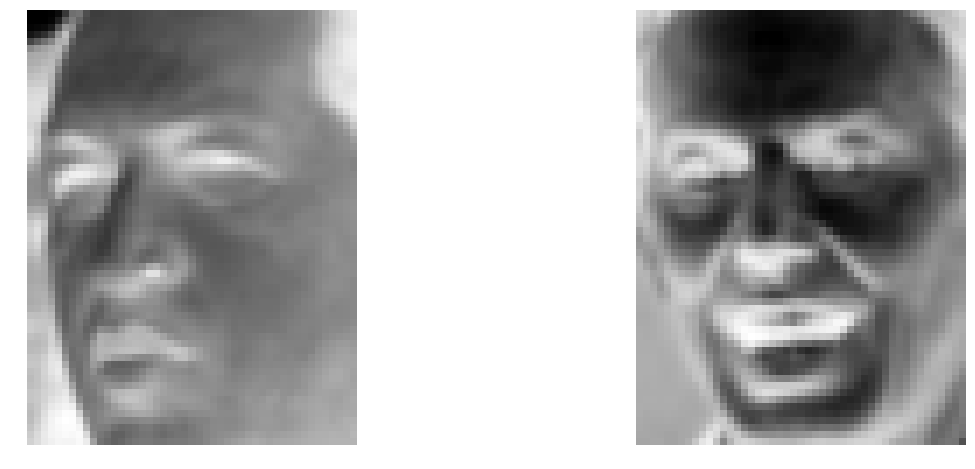

In [4]:
# create a fig to show image
fig = plt.figure(figsize=(20,8))

# for all 0-9 labels
for i in range(2):
    # initialize subplots in a grid 2x5 at i+1th position
    ax = fig.add_subplot(1, 2, 1+i)
    
    # display image
    ax.imshow(faces.images[i], cmap=plt.cm.binary)
    
    #don't show the axes
    plt.axis('off')

plt.show()

### Trích xuất đặc trưng

    - Sử dụng Local Binary Pattern. 
    

In [5]:
# import feature detector & descriptor library
from skimage.feature import local_binary_pattern

In [6]:
feature = local_binary_pattern(faces.images[0], P=8, R=0.5)

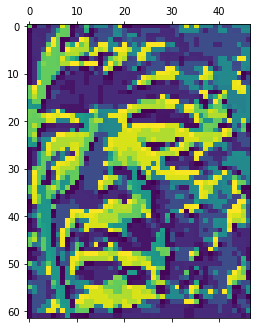

In [7]:
plt.matshow(feature)

In [8]:
import numpy as np

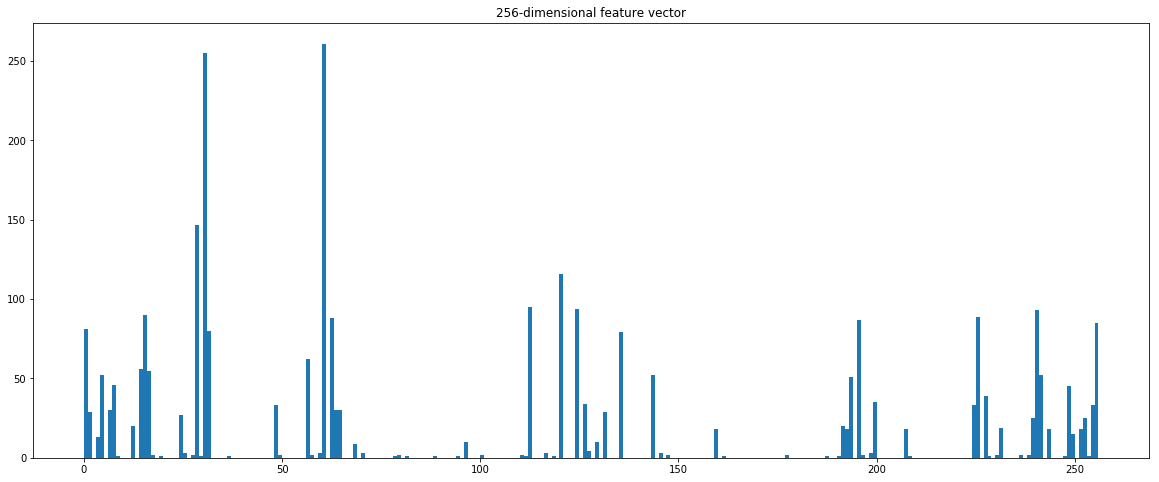

In [9]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(1,1,1)
ax.hist(feature.reshape(-1), bins=list(range(257)))
plt.title('256-dimensional feature vector')
plt.show()

### Trích xuất feature từ mỗi ảnh

In [10]:
def getLBP_feature(image):
    feature = local_binary_pattern(image, P=8, R=0.5)
    return np.histogram(feature, bins=list(range(257)))[0]

### Áp dụng KMean trên dữ liệu feature

In [17]:
# import library
from sklearn.cluster import KMeans


In [18]:
model_kmean = KMeans(n_clusters=7)

In [19]:
label_kmean = model_kmean.fit_predict(feature_LBP)

### Cross-table

In [21]:
# import library
import pandas as pd

In [22]:
df = pd.DataFrame({'label':label_kmean, 'True Label':faces.target})
ct = pd.crosstab(df['label'], df['True Label'])
print(ct.tail(10))

True Label   0   1   2    3   4   5   6
label                                  
0            7  16  29   87  22  12  22
1            9   6   5  107   5  10  22
2           23  66  32  110  15   7  31
3            5  29  20   78  17   9  14
4            8  27   2   44   9   8  13
5           11  39   7   37  16  18  20
6           14  53  26   67  25   7  22


### Visualize by PCA

In [23]:
# import library
from sklearn.decomposition import PCA

- Nhận xét hiện tại: 
    - Kết quả trả về của KMean không hiệu quả. Khó phân biệt label đúng cho mỗi vùng. 

- Sử dụng PCA để giảm số chiều feature và tiến hành visualize kết quả

In [24]:
pca = PCA(n_components=2).fit_transform(feature_LBP)

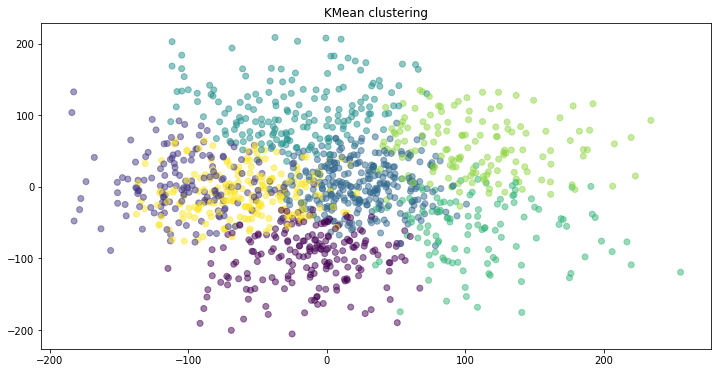

In [25]:
plt.figure(figsize=(12,6))
plt.scatter(pca[:,0], pca[:,1], c=label_kmean, alpha=0.5)
plt.title('KMean clustering')
plt.show()

#### Visualize by t-SNE

In [26]:
from sklearn.manifold import TSNE

TSNE_model = TSNE(learning_rate=100)

tnse = TSNE_model.fit_transform(feature_LBP)

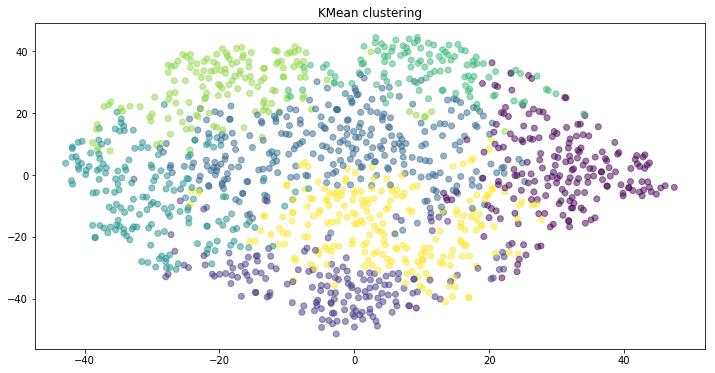

In [27]:
plt.figure(figsize=(12,6))
plt.scatter(tnse[:,0], tnse[:,1], c=label_kmean, alpha=0.5)
plt.title('KMean clustering')
plt.show()

### Cluster by Spectral Clustering

In [28]:
# import library
from sklearn.cluster import spectral_clustering
from sklearn.metrics.pairwise import cosine_similarity 

graph = cosine_similarity(feature_LBP)
label_spectral = spectral_clustering(graph, n_clusters=7)

- Cross-table 

In [29]:
# create a DataFrame with labels and truth lables of digits data
df = pd.DataFrame({'labels': label_spectral, 'Truth_labels': faces.target})

# Create a cross-tablutation
ct = pd.crosstab(df['labels'], df['Truth_labels'])

print(ct)

Truth_labels   0   1   2    3   4   5   6
labels                                   
0              6  31   9   76  12  10  29
1             13  19  25   93  15  13  18
2             15  49  25   65  19  18  20
3              4  31  11   50  29  10  20
4             25  58  37  107   6   2  12
5              7   7   8   92  11   8  14
6              7  41   6   47  17  10  31


### Visualize kết quả của thuật toán phân lớp

In [1]:
# create a fig to show image
fig = plt.figure(figsize=(11,10))

ax = fig.add_subplot(3, 2, 1)
ax.scatter(pca[:,0],pca[:,1], c=label_kmean)
ax.set_title('KMean')

ax = fig.add_subplot(3, 2, 2)
ax.scatter(pca[:,0],pca[:,1], c=label_spectral)
ax.set_title('Spectral Clustering')

ax = fig.add_subplot(3, 2, 3)
ax.scatter(pca[:,0],pca[:,1], c=faces.target)
ax.set_title('True Label')

ax = fig.add_subplot(3, 2, 5)
ax.scatter(pca[:,0],pca[:,1], c=label_agglomerative)
ax.set_title('Agglomerative Clustering')

ax = fig.add_subplot(3, 2, 6)
ax.scatter(pca[:,0],pca[:,1], c=label_dbscan)
ax.set_title('DBSCAN')

plt.show()

NameError: name 'plt' is not defined

### Visualize by T-NSE

In [2]:
# create a fig to show image
fig = plt.figure(figsize=(11,11))

ax = fig.add_subplot(3, 2, 1)
ax.scatter(tnse[:,0],tnse[:,1], c=label_kmean)
ax.set_title('KMean')

ax = fig.add_subplot(3, 2, 2)
ax.scatter(tnse[:,0],tnse[:,1], c=label_spectral)
ax.set_title('Spectral Clustering')

ax = fig.add_subplot(3, 2, 3)
ax.scatter(tnse[:,0],tnse[:,1], c=faces.target)
ax.set_title('True Label')

ax = fig.add_subplot(3, 2, 5)
ax.scatter(tnse[:,0],tnse[:,1], c=label_agglomerative)
ax.set_title('Agglomerative Clustering')

ax = fig.add_subplot(3, 2, 6)
ax.scatter(tnse[:,0],tnse[:,1], c=label_dbscan)
ax.set_title('DBSCAN')

plt.show()


NameError: name 'plt' is not defined

### Cluster by DBSCAN

In [65]:
eps, min_samples = 0.015065,10

#import DBSCAN
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='cosine')

label_dbscan = dbscan.fit_predict(feature_LBP)

# print cross-table
df_dbscan = pd.DataFrame({'labels':label_dbscan,'Truth labels':faces.target})
ct_dbscan=pd.crosstab(df_dbscan['labels'],df_dbscan['Truth labels'])
print(ct_dbscan)

Truth labels   0    1   2    3   4   5    6
labels                                     
-1            59  168  92  393  92  62  105
 0            10   51  25  118  12   5   28
 1             2    2   1    8   2   0    3
 2             0    1   2    2   1   1    8
 3             1    6   0    0   0   0    0
 4             2    4   0    7   2   2    0
 5             3    4   1    2   0   1    0


## Evaluate clustering algorithm

- Sử dụng các hệ đo lường để đánh giá thuật toán: Homogeneity, Completeness, V-measure, Adjusted Random, Adjusted Mutual Information.

In [34]:
# import library
from sklearn.metrics import adjusted_mutual_info_score


In [3]:
from sklearn import metrics
def compareAlgorithm(algorithms, targetLabel, data):
    
    print('#Sample: %d\t#Class: %d\t#feature: %d'%(data.shape[0], len(set(label_kmean)),data.shape[1]))
    print(82*'_')
    print('init\t\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')
    for algorithm in algorithms:
        print('%-9s\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
              % (algorithm,
                 metrics.homogeneity_score(targetLabel, algorithms[algorithm]),
                 metrics.completeness_score(targetLabel, algorithms[algorithm]),
                 metrics.v_measure_score(targetLabel, algorithms[algorithm]),
                 metrics.adjusted_rand_score(targetLabel, algorithms[algorithm]),
                 metrics.adjusted_mutual_info_score(targetLabel,  algorithms[algorithm]),
                 metrics.silhouette_score(data, algorithms[algorithm],
                                          metric='euclidean',
                                          sample_size=300)))
    print(82*'_')

In [4]:
compareAlgorithm({'KMean':label_kmean, 'Spectral':label_spectral,'DBSCAN':label_dbscan,'Agglomerative':label_agglomerative},\
                 faces.target, feature_LBP)

NameError: name 'label_kmean' is not defined